# Genes shared by *H. inflata, Trepomonas, K. bialata*

marked as green-red



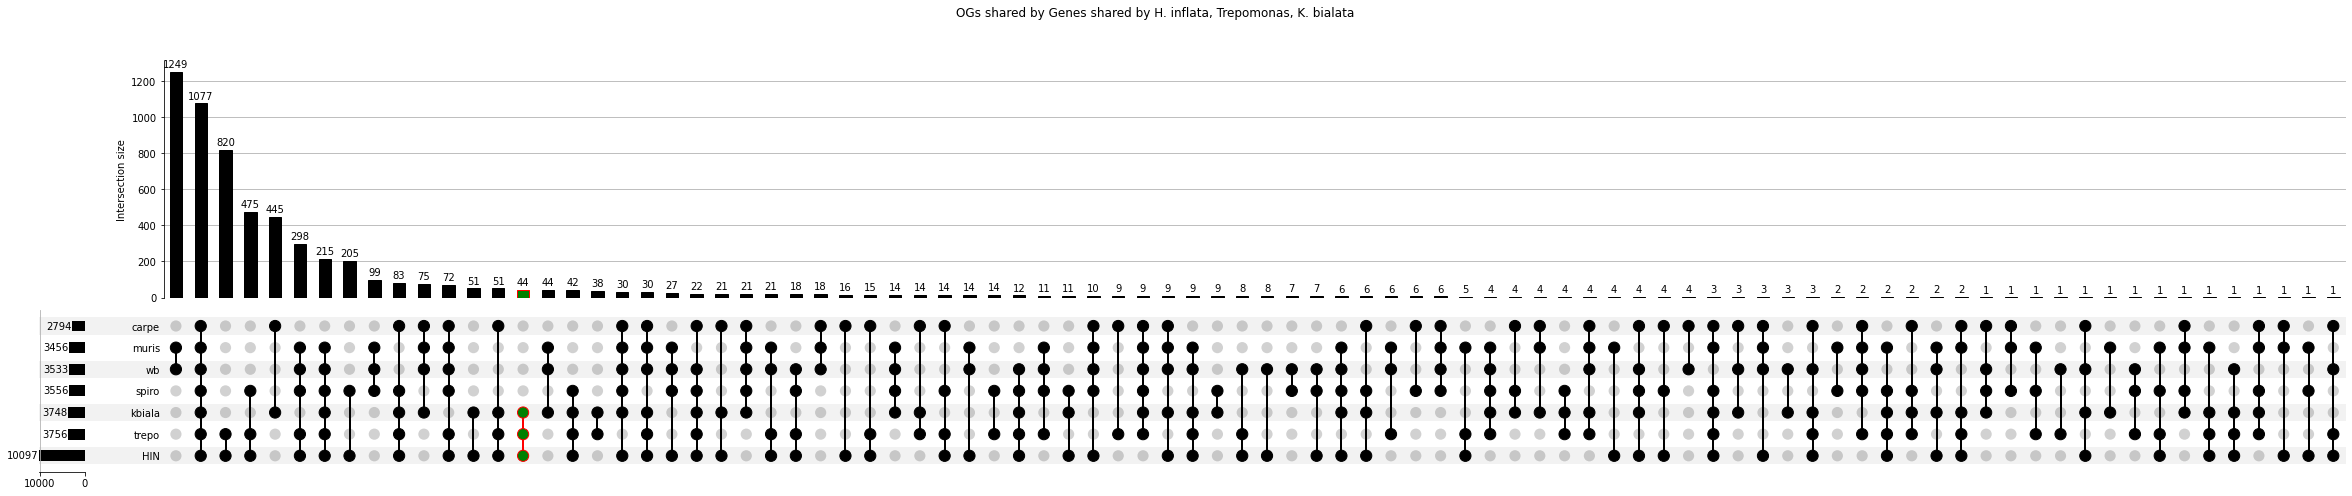

In [1]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Upset plot for only OG"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).set_index(df_count.spiro >= 1, append=True).set_index(
    df_count.wb >= 1, append=True).set_index(df_count.muris >= 1, append=True).set_index(df_count.trepo >= 1, append=True
                                                                                             ).set_index(df_count.kbiala >= 1, append=True).set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=10,
              min_degree=2,
              show_counts=True,
              sort_categories_by="cardinality",
              sort_by="cardinality")


upset.style_subsets(absent=["spiro", "wb", "muris", "carpe"],
                    min_degree=3,
                    facecolor="green",
                    edgecolor="red")

upset.plot()
plt.suptitle("OGs shared by Genes shared by H. inflata, Trepomonas, K. bialata")
plt.show()

## Extract genes from OGs

In [2]:
"OG shared by Free-livings HIN, trepo, kbiala, carpe"

df=pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df=df[["Orthogroup","HIN", "trepo", "spiro", "wb", "muris", "kbiala", "carpe", "Total"]]

og_hin_trepo_kbiala=df[(df.iloc[:,[1,2,6]] >=1).all(1)  & (df.iloc[:,[3,4,5,7]] ==0).all(1)]

print("Number of OGs= ", len(og_hin_trepo_kbiala["Orthogroup"]))
print("Total HIN genes =", og_hin_trepo_kbiala["HIN"].sum())
print("Total trepo genes =", og_hin_trepo_kbiala["trepo"].sum())
print("Total kbiala genes =", og_hin_trepo_kbiala["kbiala"].sum())

og_hin_trepo_kbiala.head()

Number of OGs=  44
Total HIN genes = 356
Total trepo genes = 85
Total kbiala genes = 69


,Orthogroup,HIN,trepo,spiro,wb,muris,kbiala,carpe,Total
193,OG0000193,53,1,0,0,0,1,0,55
202,OG0000202,48,2,0,0,0,3,0,53
301,OG0000301,33,2,0,0,0,4,0,39
415,OG0000415,28,1,0,0,0,1,0,30
529,OG0000529,23,1,0,0,0,1,0,25


In [3]:
"OG gene list"
OG_gene_list = pd.read_csv('/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct17_2/Orthogroups/Orthogroups.txt', header=None, dtype=str, delim_whitespace=True)
OG_gene_list = OG_gene_list.apply(lambda x: x.str.replace(":", ""))

"extract proteins from OG"
def extract_prot(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").set_index(0)
    return df.T

extract_prot(og_hin_trepo_kbiala).head()

,OG0000193,OG0000202,OG0000301,OG0000415,OG0000529,OG0000547,OG0000786,OG0000968,OG0001003,OG0001111,...,OG0005655,OG0005715,OG0005757,OG0005891,OG0005949,OG0006000,OG0007003,OG0007080,OG0009901,OG0009964
1,GIQ89659.1,GIQ80039.1,GCA62475.1,GIQ79754.1,GIQ83728.1,GIQ90557.1,GIQ91676.1,GIQ87077.1,GIQ81406.1,GCA65489.1,...,GIQ81730.1,GIQ85638.1,GIQ88251.1,GIQ84007.1,GCA64324.1,GCA63491.1,GIQ89342.1,GIQ88741.1,GIQ82561.1,GIQ88564.1
2,HIN_011431,GIQ85309.1,GCA62546.1,HIN_000349,HIN_008707,HIN_000946,GIQ92815.1,HIN_003312,GIQ84851.1,GIQ89333.1,...,HIN_024186,GIQ87222.1,HIN_031859,GIQ84234.1,GIQ83960.1,HIN_057773,HIN_021561,HIN_023466,HIN_057389,HIN_061544
3,HIN_030199,GIQ86886.1,GCA62861.1,HIN_000351,HIN_016223,HIN_000949,HIN_024331,HIN_003334,HIN_020028,GIQ92948.1,...,HIN_069000,HIN_028528,HIN_064251,GIQ86683.1,HIN_049325,HIN_062630,HIN_087244,HIN_080168,TPC1_11432,TPC1_10727
4,HIN_030202,HIN_012221,GCA64589.1,HIN_009896,HIN_016225,HIN_001010,HIN_052552,HIN_003337,HIN_020048,HIN_019349,...,HIN_083599,HIN_050834,HIN_096292,HIN_041506,HIN_057927,HIN_088228,TPC1_10313,TPC1_14273,NaN,NaN
5,HIN_030205,HIN_012230,HIN_004974,HIN_009898,HIN_016227,HIN_001047,HIN_099093,HIN_003344,HIN_039541,HIN_019353,...,TPC1_16010,TPC1_14495,TPC1_16492,TPC1_16424,TPC1_13430,TPC1_14914,NaN,NaN,NaN,NaN


In [4]:
extract_prot(og_hin_trepo_kbiala).to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_hin_trepo_kbiala.csv", header="infer", index=False, sep="\t")

## add annotation

In [5]:
import glob

"OG diplo subset gene list with annotations"


def OG_stack(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").rename(columns={0: "OG"}).set_index("OG")
    df = df.stack().reset_index().drop(columns=["level_1"])
    return df


df_og_stack = OG_stack(og_hin_trepo_kbiala)

"Add annotations"
path = '/Users/zeyku390/PycharmProjects/H.inflata/jupyter/data/*.csv'
list_files = glob.glob(path)

#get species name from the filenames
sp_dic = {}
for element in list_files:
    i = element.split("_annot")[0]
    i = i.split("/")[-1]
    sp_dic[i] = element

dic_annot = {}
for key, value in sp_dic.items():
    dic_annot[key] = pd.read_csv(value, sep="\t", header="infer")


def add_annot(df, df_annot):
    df = pd.merge(df, df_annot, right_on="id", left_on=0, how="left").drop(columns=[0]).dropna()
    return df


df1 = add_annot(OG_stack(og_hin_trepo_kbiala), dic_annot["HIN"])
df2 = add_annot(OG_stack(og_hin_trepo_kbiala), dic_annot["trepo"])
df3 = add_annot(OG_stack(og_hin_trepo_kbiala), dic_annot["kbiala"])

df_og_stack_annot = pd.concat([df1, df2, df3], axis=0)
df_og_stack_annot

,OG,id,desc
1,OG0000193,HIN_011431,"HIN_011431 Kinase, NEK"
2,OG0000193,HIN_030199,HIN_030199 Helicase-related protein
3,OG0000193,HIN_030202,HIN_030202 Helicase-related protein
4,OG0000193,HIN_030205,HIN_030205 Helicase-related protein
5,OG0000193,HIN_030212,HIN_030212 Conserved hypothetical protein
...,...,...,...
491,OG0006000,GCA63491.1,GCA63491.1 hypothetical protein KIPB_010257 [K...
496,OG0007003,GIQ89342.1,"GIQ89342.1 dynein heavy chain 6, axonemal, par..."
500,OG0007080,GIQ88741.1,"GIQ88741.1 peptidase C1A, partial [Kipferlia b..."
504,OG0009901,GIQ82561.1,"GIQ82561.1 DNA-directed RNA pol I, largest sub..."


In [6]:
df_og_stack_annot.to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_hin_trepo_kbiala_annot.csv",
                         sep="\t", header="infer", index=False)